Chapter 18
# 用voxels展示色彩空间
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# import os

# # 如果文件夹不存在，创建文件夹
# if not os.path.isdir("Figures"):
#     os.makedirs("Figures")

In [2]:
def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

## RGB色彩空间

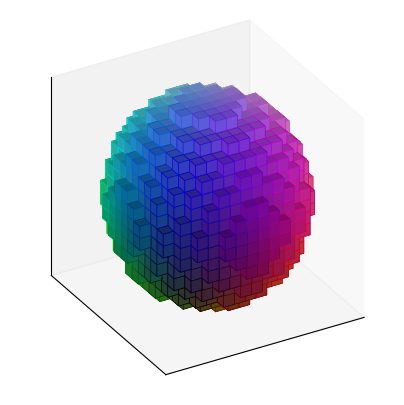

In [3]:

r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

ax.view_init(azim=-120, elev=30) 
ax.set_proj_type('ortho')
# ax.set_zlim(-3,3)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(aspect = (1,1,1))

# fig.savefig('Figures/RGB色块.svg', format='svg')

## CMYK空间

In [6]:
r, theta, z = np.mgrid[0:1:21j, 0:np.pi*2:25j, -0.5:0.5:21j]
x = r*np.cos(theta)
y = r*np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7)**2 + (zc + 0.2*np.cos(thetac*2))**2 < 0.2**2

# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi*2)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.5
colors = mpl.colors.hsv_to_rgb(hsv)

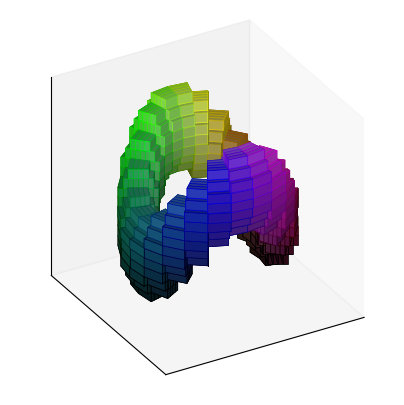

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.voxels(x, y, z, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

ax.view_init(azim=-120, elev=30) 
ax.set_proj_type('ortho')
# ax.set_zlim(-3,3)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(aspect = (1,1,1))

# fig.savefig('Figures/CMYK色块.svg', format='svg')

参考：  
https://matplotlib.org/stable/gallery/mplot3d/voxels_rgb.html  
https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.voxels.html  